# HW3: Part c1. Pure Tensorflow Neural Network - no Auto Differentiation 

##CMPE-258: Deep Learning, Vijay Eranti
##Samer Baslan
##SJSU Spring 2021

#Reference: https://www.tensorflow.org/guide/basic_training_loops

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##Generate Data

In [ ]:
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 1000

#A vector of random x values
x = tf.random.normal(shape = [NUM_EXAMPLES])

#Generate some noise
noise = tf.random.normal(shape = [NUM_EXAMPLES])

#Calculate y
y = x * TRUE_W + TRUE_B + noise

##Define the model

In [ ]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.w * x + self.b

In [ ]:
model = MyModel()

print("Variables:", model.variables)

Variables: (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)


In [ ]:
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

In [ ]:
print("Current loss: %1.6f" % loss(y, model(x)).numpy())

Current loss: 8.606328


##Define a training loop

In [ ]:
def train(model, x, y, learning_rate):
  model.w.assign_sub(learning_rate)
  model.b.assign_sub(learning_rate)

In [ ]:
model = MyModel()

Ws, bs = [], []
epochs = range(10)

def training_loop(model, x, y):
  for epoch in epochs:

    train(model, x, y, learning_rate = 0.1)

    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(y, model(x))

    print("Epoch %2d: W = %1.2f b = %1.2f, loss = %2.5f" %
          (epoch, Ws[-1], bs[-1], current_loss))

Starting: W=5.00 b=0.00, loss=8.60633
Epoch  0: W = 4.90 b = -0.10, loss = 8.65045
Epoch  1: W = 4.80 b = -0.20, loss = 8.73422
Epoch  2: W = 4.70 b = -0.30, loss = 8.85765
Epoch  3: W = 4.60 b = -0.40, loss = 9.02073
Epoch  4: W = 4.50 b = -0.50, loss = 9.22346
Epoch  5: W = 4.40 b = -0.60, loss = 9.46584
Epoch  6: W = 4.30 b = -0.70, loss = 9.74788
Epoch  7: W = 4.20 b = -0.80, loss = 10.06957
Epoch  8: W = 4.10 b = -0.90, loss = 10.43091
Epoch  9: W = 4.00 b = -1.00, loss = 10.83191


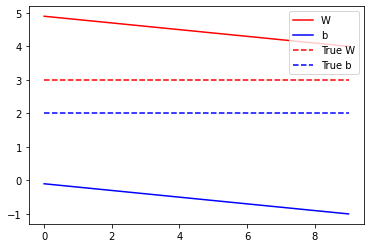

In [ ]:
print("Starting: W=%1.2f b=%1.2f, loss=%2.5f" %
      (model.w, model.b, loss(y, model(x))))

#do the training
training_loop(model, x, y)

#plot it

plt.plot(epochs, Ws, "r",
         epochs, bs, "b")

plt.plot([TRUE_W] * len(epochs), "r--",
         [TRUE_B] * len(epochs), "b--")

plt.legend(["W", "b", "True W", "True b"])
plt.show()

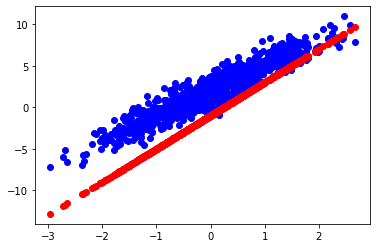

Current loss: 10.831907


In [ ]:
# Visualize how the trained model performs
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()  

print("Current loss: %1.6f" % loss(model(x), y).numpy())